## Project: Data Wrangling

### Table of Contents

* Gather
* Assess
* Clean
* Analyze/Visualize

In [235]:
# importing the libraries i will use

import pandas as pd
import requests
import json
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Gather

In this section I will gather and load the data I will use.

In [236]:
# reading the twitter-archive file

df_twitter_archive = pd.read_csv('C:/Users/Alex/Desktop/Twitter data-project/twitter-archive-enhanced.csv')

In [237]:
# reading the image-prediction file

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

In [238]:
with open(r'C:/Users/Alex/Desktop/Twitter data-project/image.predictions.tsv', 'wb') as f:
    f.write(r.content)

In [239]:
df_image_predictions = pd.read_csv('C:/Users/Alex/Desktop/Twitter data-project/image.predictions.tsv', sep='\t')

In [240]:
# reading the tweets file

tweet_list= []
with open('C:/Users/Alex/Desktop/Twitter data-project/tweet-json.txt') as json_file:
    for line in json_file:
        data = json.loads(line)
        tweet_id = data['id']
        tweet_dictionary = {
          'tweet_id': data['id'],
          'retweet_count': data['retweet_count'],
          'favorite_count': data['favorite_count'] 
    }
        tweet_list.append(tweet_dictionary)
df_tweets = pd.DataFrame(tweet_list)

### Assess

In this section, I will assess the data to find quality and tidiness issues that I will document below.

In [241]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [242]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [243]:
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [244]:
# the data type of "timestamp" and "retweeted_status_timestamp" are string objects instead of date type.

df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [245]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [246]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [247]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [248]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [249]:
df_tweets.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [250]:
# the numerator in the tweet is "13.5", but in the "rating_numerator"-column it is "5"

df_twitter_archive["text"].iloc[45]


'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [251]:
df_twitter_archive["rating_numerator"].iloc[45]

5

In [252]:
# some values in "rating_denominator" are not "10"

values_not_ten = [x for x in df_twitter_archive["rating_denominator"] if x != 10]
print(values_not_ten)

[0, 15, 70, 7, 11, 150, 11, 170, 20, 50, 90, 80, 50, 50, 40, 20, 130, 110, 11, 16, 120, 80, 2]


In [253]:
# first letter for some values in "name" start with a lower case letter, which does not seem to be a name

first_letter_lower = [x for x in df_twitter_archive["name"] if x == x.lower()]
print(first_letter_lower)

['such', 'a', 'quite', 'quite', 'quite', 'not', 'one', 'incredibly', 'a', 'mad', 'an', 'very', 'a', 'very', 'just', 'my', 'one', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just', 'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a', 'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a', 'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a']


In [254]:
# the values that are not NaN are retweets

retweets = [x for x in df_twitter_archive["retweeted_status_id"] if np.isnan(x) == False]
print(retweets)

[8.874739571039519e+17, 8.860537344211026e+17, 8.305833205850685e+17, 8.780576130401157e+17, 8.782815110064783e+17, 6.690003974455337e+17, 8.76850772322988e+17, 8.663349647612027e+17, 8.688803978194944e+17, 8.732137756329779e+17, 8.726575842595512e+17, 8.41077006473257e+17, 8.591969789027738e+17, 8.685522785248379e+17, 8.650134204453683e+17, 8.664507055314575e+17, 8.378201676945285e+17, 8.630624715311677e+17, 8.06629075125203e+17, 8.605637731402097e+17, 8.609144852504699e+17, 7.616729943768064e+17, 8.395493263596708e+17, 8.57061112319234e+17, 8.44704788403114e+17, 8.563301587682181e+17, 8.421635325903749e+17, 8.551225332674601e+17, 8.316500515250545e+17, 8.29374341691347e+17, 8.482893821761004e+17, 8.331246945974436e+17, 8.323698773316936e+17, 8.47971000004354e+17, 7.562885340304753e+17, 7.733088242540298e+17, 8.071068405092147e+17, 8.174238601360835e+17, 8.406323370628628e+17, 6.671521640794235e+17, 8.392899192982241e+17, 8.3890598062882e+17, 7.838399664052306e+17, 8.207497168456868e+

#### Quality 
##### `twitter archive` table

* "timestamp" and "retweeted_status_timestamp data type is string object and not datetype. FIX!
* Missing values in "id"-columns. Replace with NaN?
* "rating_denominator" has some values that are not "10"
* There are dog names with first letter in lowercase that are not names. FIX!
* "None" in "name"-column, which can be changed to "NaN"
* Some rows in "id"-columns are retweets and can be dropped. FIX!
* The ratings in the tweets sometimes do not correspond to the ratings in "rating_denominator" and "rating_numerator". For example, the rating for row 46 is 13.5/10, but it says 5 in the column "rating_denominator". FIX! Some Issues
* The data type for the id-columns are either "int" or "float". Can be changed to "string". FIX!
* Trailing and leading whitespaces in some rows.
* "expanded_url" sometimes has two url-adresses in the same column and the adresses do not seem to work
* "source"-column contain url-addresses besides the source. FIX!


##### `image predictions` table

* "tweet_id" is int and can be changed to string object. FIX!

##### `tweets` table

* "tweet_id" is int and can be changed to string object. FIX!

#### Tidiness
##### `twitter archive` table

* The columns: "doggo", "floofer", "pupper", "puppo" can be merged into one column. FIX!
* Rating numerator and denominator could be in one column
* The three datasets can be merged into one master dataset. FIX!


##### `image prediction` table

* The column-names are not so easy to understand. Would be better to rename them. FIX!


### Clean

I will clean and filter the data to make it ready for further analysis and visualizations

In [255]:
# creating a copy of the dataframes

df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweets_clean = df_tweets.copy()

In [256]:
# converting "timestamp" and "retweeted_status_timestamp" from string to datetime

df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp'])
df_twitter_archive_clean['retweeted_status_timestamp'] = pd.to_datetime(df_twitter_archive_clean['retweeted_status_timestamp'])

In [257]:
# replacing the values that start with a lower case letter with NaN

mask = ~df_twitter_archive_clean.name.isna() & df_twitter_archive_clean.name.str.islower()

df_twitter_archive_clean.loc[mask,'name'] = np.nan

In [258]:
# dropping rows that are retweets and only keeping rows that are NaN

df_twitter_archive_clean['retweeted_status_id'] = df_twitter_archive_clean[df_twitter_archive_clean['retweeted_status_id'].isnull() == True ]

In [259]:
# changing the data type from either int or float to string for the "id"-columns in "twitter_archive"-table

df_twitter_archive_clean['tweet_id'] = df_twitter_archive_clean['tweet_id'].astype(str)
df_twitter_archive_clean['in_reply_to_status_id'] = df_twitter_archive_clean['in_reply_to_status_id'].astype(str)
df_twitter_archive_clean['in_reply_to_user_id'] = df_twitter_archive_clean['in_reply_to_user_id'].astype(str)
df_twitter_archive_clean['retweeted_status_id'] = df_twitter_archive_clean['retweeted_status_id'].astype(str)
df_twitter_archive_clean['retweeted_status_user_id'] = df_twitter_archive_clean['retweeted_status_user_id'].astype(str)
df_twitter_archive_clean['rating_numerator'] = df_twitter_archive_clean['rating_numerator'].astype(float)

In [260]:
# changing "tweet_id" from int to string object in "image_prediction"-table

df_image_predictions_clean['tweet_id'] = df_image_predictions_clean['tweet_id'].astype(str)


In [261]:
# changing "tweet_id" from int to string object in "tweets"-table

df_tweets_clean['tweet_id'] = df_tweets_clean['tweet_id'].astype(str)


In [262]:
# renaming column-names in "image_predictions"-table

df_image_predictions_clean.rename(columns={"p1":"prediction1", "p2":"prediction2", "p3":"prediction3"}, inplace=True)

In [263]:
df_image_predictions_clean.rename(columns={"p1_conf":"prediction1_confidence", "p2_conf":"prediction2_confidence", "p3_conf":"prediction3_confidence"}, inplace=True)

In [264]:
df_image_predictions_clean.rename(columns={"p1_dog":"prediction1_is_it_dog", "p2_dog":"prediction2_is_it_dog", "p3_dog":"prediction3_is_it_dog"}, inplace=True)

In [265]:
# extracting numerator and denominator values from "text"-column

rating = df_twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
df_twitter_archive_clean.loc[rating.index, ['rating_numerator', 'rating_denominator']] = rating[['rating_numerator', 'rating_denominator']]


In [266]:
# extracting source from "source"-column and getting rid of the url

df_twitter_archive_clean['source'] = df_twitter_archive_clean.source.str.extract('(?<=\>)(.*?)(?=\<)', expand=True)


In [267]:
# merging the dog stages to one column

df_twitter_archive_clean['doggo'].replace('None', '', inplace=True)
df_twitter_archive_clean['floofer'].replace('None', '', inplace=True)
df_twitter_archive_clean['pupper'].replace('None', '', inplace=True)
df_twitter_archive_clean['puppo'].replace('None', '', inplace=True)
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean['doggo'] + df_twitter_archive_clean['floofer'] +  df_twitter_archive_clean['pupper'] + df_twitter_archive_clean['puppo']
df_twitter_archive_clean.loc[df_twitter_archive_clean['dog_stage'] == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_twitter_archive_clean.loc[df_twitter_archive_clean['dog_stage'] == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_twitter_archive_clean.loc[df_twitter_archive_clean['dog_stage'] == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
df_twitter_archive_clean.loc[df_twitter_archive_clean['dog_stage'] == '', 'dog_stage'] = np.nan

df_twitter_archive_clean.drop(columns=['doggo', 'puppo', 'pupper', 'floofer'], inplace=True)

In [268]:
# code to merge the dataframes to one master dataframe

df_master = df_twitter_archive_clean.merge(df_image_predictions_clean,on='tweet_id').merge(df_tweets_clean,on='tweet_id')

### Test

In [269]:
# now the "timestamp"-column and "retweeted_status_timestamp"-column are converted to datetime data type. The "id"-columns are now string objects

df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         2356 non-null   object             
 7   retweeted_status_user_id    2356 non-null   object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   object          

In [270]:
# "tweet_id" is now string object in "image_prediction"-table

df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                2075 non-null   object 
 1   jpg_url                 2075 non-null   object 
 2   img_num                 2075 non-null   int64  
 3   prediction1             2075 non-null   object 
 4   prediction1_confidence  2075 non-null   float64
 5   prediction1_is_it_dog   2075 non-null   bool   
 6   prediction2             2075 non-null   object 
 7   prediction2_confidence  2075 non-null   float64
 8   prediction2_is_it_dog   2075 non-null   bool   
 9   prediction3             2075 non-null   object 
 10  prediction3_confidence  2075 non-null   float64
 11  prediction3_is_it_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [271]:
# "tweet_id" is now string object in "tweets"-table

df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [272]:
# values with lower case letters are now NaN

df_twitter_archive_clean.loc[mask]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
22,887517139158093824,nan,nan,2017-07-19 03:39:09+00:00,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. Th...,8.875171391580938e+17,nan,NaT,https://twitter.com/dog_rates/status/887517139...,14,10,NaN,NaN
56,881536004380872706,nan,nan,2017-07-02 15:32:16+00:00,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,8.815360043808727e+17,nan,NaT,https://twitter.com/dog_rates/status/881536004...,14,10,NaN,pupper
118,869988702071779329,nan,nan,2017-05-31 18:47:24+00:00,Twitter for iPhone,RT @dog_rates: We only rate dogs. This is quit...,nan,4196983835.0,2017-05-02 00:04:57+00:00,https://twitter.com/dog_rates/status/859196978...,12,10,NaN,NaN
169,859196978902773760,nan,nan,2017-05-02 00:04:57+00:00,Twitter for iPhone,We only rate dogs. This is quite clearly a smo...,8.591969789027738e+17,nan,NaT,https://twitter.com/dog_rates/status/859196978...,12,10,NaN,NaN
193,855459453768019968,nan,nan,2017-04-21 16:33:22+00:00,Twitter for iPhone,"Guys, we only rate dogs. This is quite clearly...",8.5545945376802e+17,nan,NaT,https://twitter.com/dog_rates/status/855459453...,12,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,nan,nan,2015-11-16 00:35:11+00:00,Twitter for iPhone,This is an odd dog. Hard on the outside but lo...,6.660518538268508e+17,nan,NaT,https://twitter.com/dog_rates/status/666051853...,2,10,NaN,NaN
2350,666050758794694657,nan,nan,2015-11-16 00:30:50+00:00,Twitter for iPhone,This is a truly beautiful English Wilson Staff...,6.660507587946947e+17,nan,NaT,https://twitter.com/dog_rates/status/666050758...,10,10,NaN,NaN
2352,666044226329800704,nan,nan,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6.660442263298007e+17,nan,NaT,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN
2353,666033412701032449,nan,nan,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,6.660334127010324e+17,nan,NaT,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN


In [273]:
# all the values left in the "retweeted_status_id"-column are now NaN. The retweets have been removed

df_twitter_archive.retweeted_status_id.isnull().count()

2356

In [274]:
# now the value for "rating_numerator" is 13.5 instead of 5

df_twitter_archive_clean['rating_numerator'].iloc[45]

'13.5'

In [275]:
# the urls are now gone and only the source is left for each row. Examples below

print(df_twitter_archive_clean["source"].iloc[2]),
print(df_twitter_archive_clean["source"].iloc[733])

Twitter for iPhone
Vine - Make a Scene


In [276]:
# the column-names are now changed to names that are easier to understand

df_image_predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_is_it_dog,prediction2,prediction2_confidence,prediction2_is_it_dog,prediction3,prediction3_confidence,prediction3_is_it_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [277]:
# the dog stages are now combined into one column

df_twitter_archive_clean.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,8.924206435553362e+17,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,8.921774213063434e+17,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,8.918151813780849e+17,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,8.916895572798587e+17,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,8.913275589266883e+17,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,nan,nan,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,8.910879508758979e+17,nan,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,nan,nan,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,8.909719131739914e+17,nan,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,nan,nan,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,8.907291814112379e+17,nan,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,nan,nan,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,8.906091851503124e+17,nan,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,nan,nan,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,8.902402553491988e+17,nan,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [278]:
# the three dataframes are now merged into one master dataframe

df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,prediction1_confidence,prediction1_is_it_dog,prediction2,prediction2_confidence,prediction2_is_it_dog,prediction3,prediction3_confidence,prediction3_is_it_dog,retweet_count,favorite_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,8.924206435553362e+17,nan,NaT,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,8.921774213063434e+17,nan,NaT,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,8.918151813780849e+17,nan,NaT,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,8.916895572798587e+17,nan,NaT,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,8.913275589266883e+17,nan,NaT,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


### Analyze/Visualize

Here I will use the cleaned data to answer the questions below

#### Questions:

* What tweets have the highest likes and retweets?
* What are the most common dog names?
* What dog breeds are most favorited?
* What dog breed has the highest level of confidence?
* What dog breeds were predicted most often?

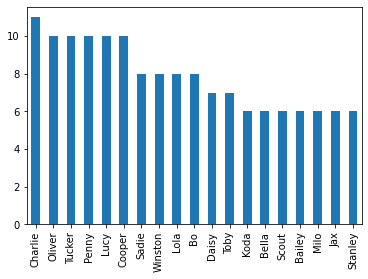

In [279]:
# the most common dog names
    
df_master['name'].value_counts(sort=True)[1:20].plot.bar();


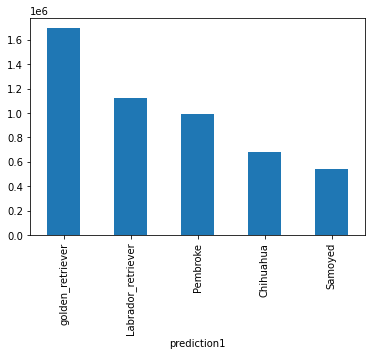

In [280]:
# plotting top-5 dog breeds that are the most favorited on twitter

df_master.groupby(["prediction1"])['favorite_count'].sum().sort_values(ascending=False).iloc[0:5].plot.bar();

In [285]:
# how many times the dog breeds were predicted. It is interesting because the top-3 dog breeds are also the most favorited dog breeds
# on twitter. 

df_master["prediction1"].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               88
Chihuahua              83
pug                    57
                     ... 
lacewing                1
giant_panda             1
cheeseburger            1
shield                  1
grey_fox                1
Name: prediction1, Length: 378, dtype: int64

In [286]:
# looking at the average level of confidence, we can see that dog breeds are not in the top. The first dog breed is a Brittany Spaniel that has a 87 % level of confidence. 

df_master.groupby('prediction1')['prediction1_confidence'].mean().sort_values(ascending=False).iloc[0:40]

prediction1
ping-pong_ball              0.999945
peacock                     0.999924
school_bus                  0.999833
bib                         0.998814
slug                        0.998075
zebra                       0.997673
fountain                    0.997509
china_cabinet               0.996031
flamingo                    0.992710
fiddler_crab                0.992069
cowboy_boot                 0.990253
electric_fan                0.984377
microwave                   0.981946
teapot                      0.981819
platypus                    0.974075
komondor                    0.972531
barbell                     0.971581
panpipe                     0.962572
sulphur-crested_cockatoo    0.960276
carton                      0.952613
clumber                     0.946718
otter                       0.945537
studio_couch                0.944692
mortarboard                 0.936882
envelope                    0.933016
scorpion                    0.927956
conch                     

In [287]:
# the tweet that was retweeted the most number of times

df_master.groupby('text')['retweet_count'].sum().sort_values(ascending=False).iloc[0:1]

text
Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4    79515
Name: retweet_count, dtype: int64

In [288]:
# the tweet that was favorited the most number of times

df_master.groupby('text')['favorite_count'].sum().sort_values(ascending=False).iloc[0:1]

text
Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc    132810
Name: favorite_count, dtype: int64

### Saving the master dataframe locally

In [234]:
df_master.to_csv('df_master.csv')